In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd

import seaborn as sns 

# Import DATASET

In [2]:
dataset=pd.read_excel("C:/Users/shaik/student_dataset.xlsx")
dataset

,S.NO,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,TOTAL,CERTIFICATE
0,1,20,38,25,83,DISTINCTION
1,2,15,25,0,40,COMPLETION
2,3,20,31,25,76,FIRST CLASS
3,4,20,25,25,70,FIRST CLASS
4,5,20,17,15,52,FIRST CLASS
...,...,...,...,...,...,...
362,363,15,0,10,25,PARTICIPATION
363,364,20,9,25,54,COMPLETION
364,365,15,20,25,60,FIRST CLASS
365,366,15,0,10,25,PARTICIPATION


# Slicing the Dataset

In [3]:
student_certification=dataset.drop(['S.NO','TOTAL'],axis=1)
student_certification

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,CERTIFICATE
0,20,38,25,DISTINCTION
1,15,25,0,COMPLETION
2,20,31,25,FIRST CLASS
3,20,25,25,FIRST CLASS
4,20,17,15,FIRST CLASS
...,...,...,...,...
362,15,0,10,PARTICIPATION
363,20,9,25,COMPLETION
364,15,20,25,FIRST CLASS
365,15,0,10,PARTICIPATION


# Information of Dataset

In [4]:
student_certification.shape

(367, 4)

In [5]:
student_certification['CERTIFICATE'].unique()

array(['DISTINCTION', 'COMPLETION', 'FIRST CLASS', 'PARTICIPATION'],
      dtype=object)

In [6]:
student_certification.groupby('CERTIFICATE').size()

CERTIFICATE
COMPLETION       117
DISTINCTION       32
FIRST CLASS       66
PARTICIPATION    152
dtype: int64

# Certificate Visualization

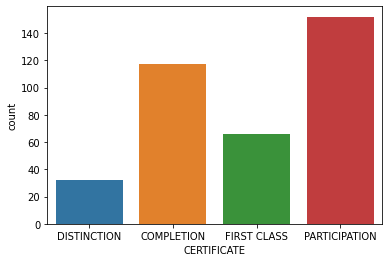

In [7]:
sns.countplot(student_certification['CERTIFICATE'],label='COUNT')

# Split the data into dependent and independent Variables

In [8]:
y =student_certification.iloc[:,-1].values.reshape(-1,1)

In [9]:
y.shape

(367, 1)

In [10]:
y

array([['DISTINCTION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['PARTICIPATION'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],


In [11]:
x =student_certification.drop(['CERTIFICATE'],axis=1)

In [12]:
x

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT
0,20,38,25
1,15,25,0
2,20,31,25
3,20,25,25
4,20,17,15
...,...,...,...
362,15,0,10
363,20,9,25
364,15,20,25
365,15,0,10


# split the data as Training and Testing Set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)

In [15]:
x_train.shape

(275, 3)

In [16]:
x_test.shape

(92, 3)

In [17]:
y_train.shape

(275, 1)

In [18]:
y_test.shape

(92, 1)

# Decision Tree Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
DC = DecisionTreeClassifier(criterion ='entropy')

In [21]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
z = DC.fit(x_train,y_train)

In [23]:
z

DecisionTreeClassifier(criterion='entropy')

# Prediction

In [24]:
y_pred = DC.predict(x_test)

In [25]:
y_pred

array(['DISTINCTION', 'PARTICIPATION', 'COMPLETION', 'COMPLETION',
       'FIRST CLASS', 'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION',
       'PARTICIPATION', 'DISTINCTION', 'FIRST CLASS', 'COMPLETION',
       'PARTICIPATION', 'FIRST CLASS', 'FIRST CLASS', 'PARTICIPATION',
       'COMPLETION', 'PARTICIPATION', 'DISTINCTION', 'PARTICIPATION',
       'DISTINCTION', 'PARTICIPATION', 'DISTINCTION', 'PARTICIPATION',
       'PARTICIPATION', 'COMPLETION', 'PARTICIPATION', 'PARTICIPATION',
       'PARTICIPATION', 'PARTICIPATION', 'COMPLETION', 'PARTICIPATION',
       'PARTICIPATION', 'PARTICIPATION', 'COMPLETION', 'FIRST CLASS',
       'COMPLETION', 'FIRST CLASS', 'FIRST CLASS', 'PARTICIPATION',
       'FIRST CLASS', 'DISTINCTION', 'COMPLETION', 'FIRST CLASS',
       'COMPLETION', 'DISTINCTION', 'PARTICIPATION', 'PARTICIPATION',
       'COMPLETION', 'COMPLETION', 'PARTICIPATION', 'PARTICIPATION',
       'COMPLETION', 'COMPLETION', 'PARTICIPATION', 'COMPLETION',
       'COMPLETION', 'PARTI

# Actual vs Predicted

In [26]:
final = pd.DataFrame(y_test, columns=['Actual'])

In [27]:
final["Predicted"]=y_pred

In [28]:
final

,Actual,Predicted
0,DISTINCTION,DISTINCTION
1,PARTICIPATION,PARTICIPATION
2,FIRST CLASS,COMPLETION
3,COMPLETION,COMPLETION
4,PARTICIPATION,FIRST CLASS
...,...,...
87,DISTINCTION,DISTINCTION
88,COMPLETION,PARTICIPATION
89,PARTICIPATION,PARTICIPATION
90,FIRST CLASS,FIRST CLASS


In [29]:
final.groupby('Actual').size()

Actual
COMPLETION       28
DISTINCTION      12
FIRST CLASS      14
PARTICIPATION    38
dtype: int64

In [30]:
final.groupby('Predicted').size()

Predicted
COMPLETION       30
DISTINCTION       9
FIRST CLASS      16
PARTICIPATION    37
dtype: int64

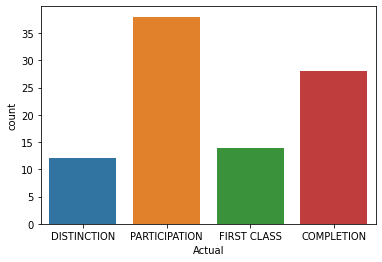

In [31]:
sns.countplot(final['Actual'], label='count')

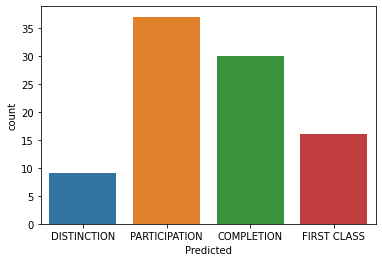

In [32]:
sns.countplot(final['Predicted'], label='Predicted')

# Performance Metrics

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
acc =(accuracy_score(y_test, y_pred))*100
acc

76.08695652173914

In [35]:
a = confusion_matrix(y_test, y_pred)
a

array([[21,  2,  3,  2],
       [ 2,  6,  4,  0],
       [ 5,  1,  8,  0],
       [ 2,  0,  1, 35]], dtype=int64)

In [36]:
mat = pd.DataFrame(a, columns=['Part','Comp','First','Dist'], index=['Part','Comp','First','Dist'])
mat

,Part,Comp,First,Dist
Part,21,2,3,2
Comp,2,6,4,0
First,5,1,8,0
Dist,2,0,1,35


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

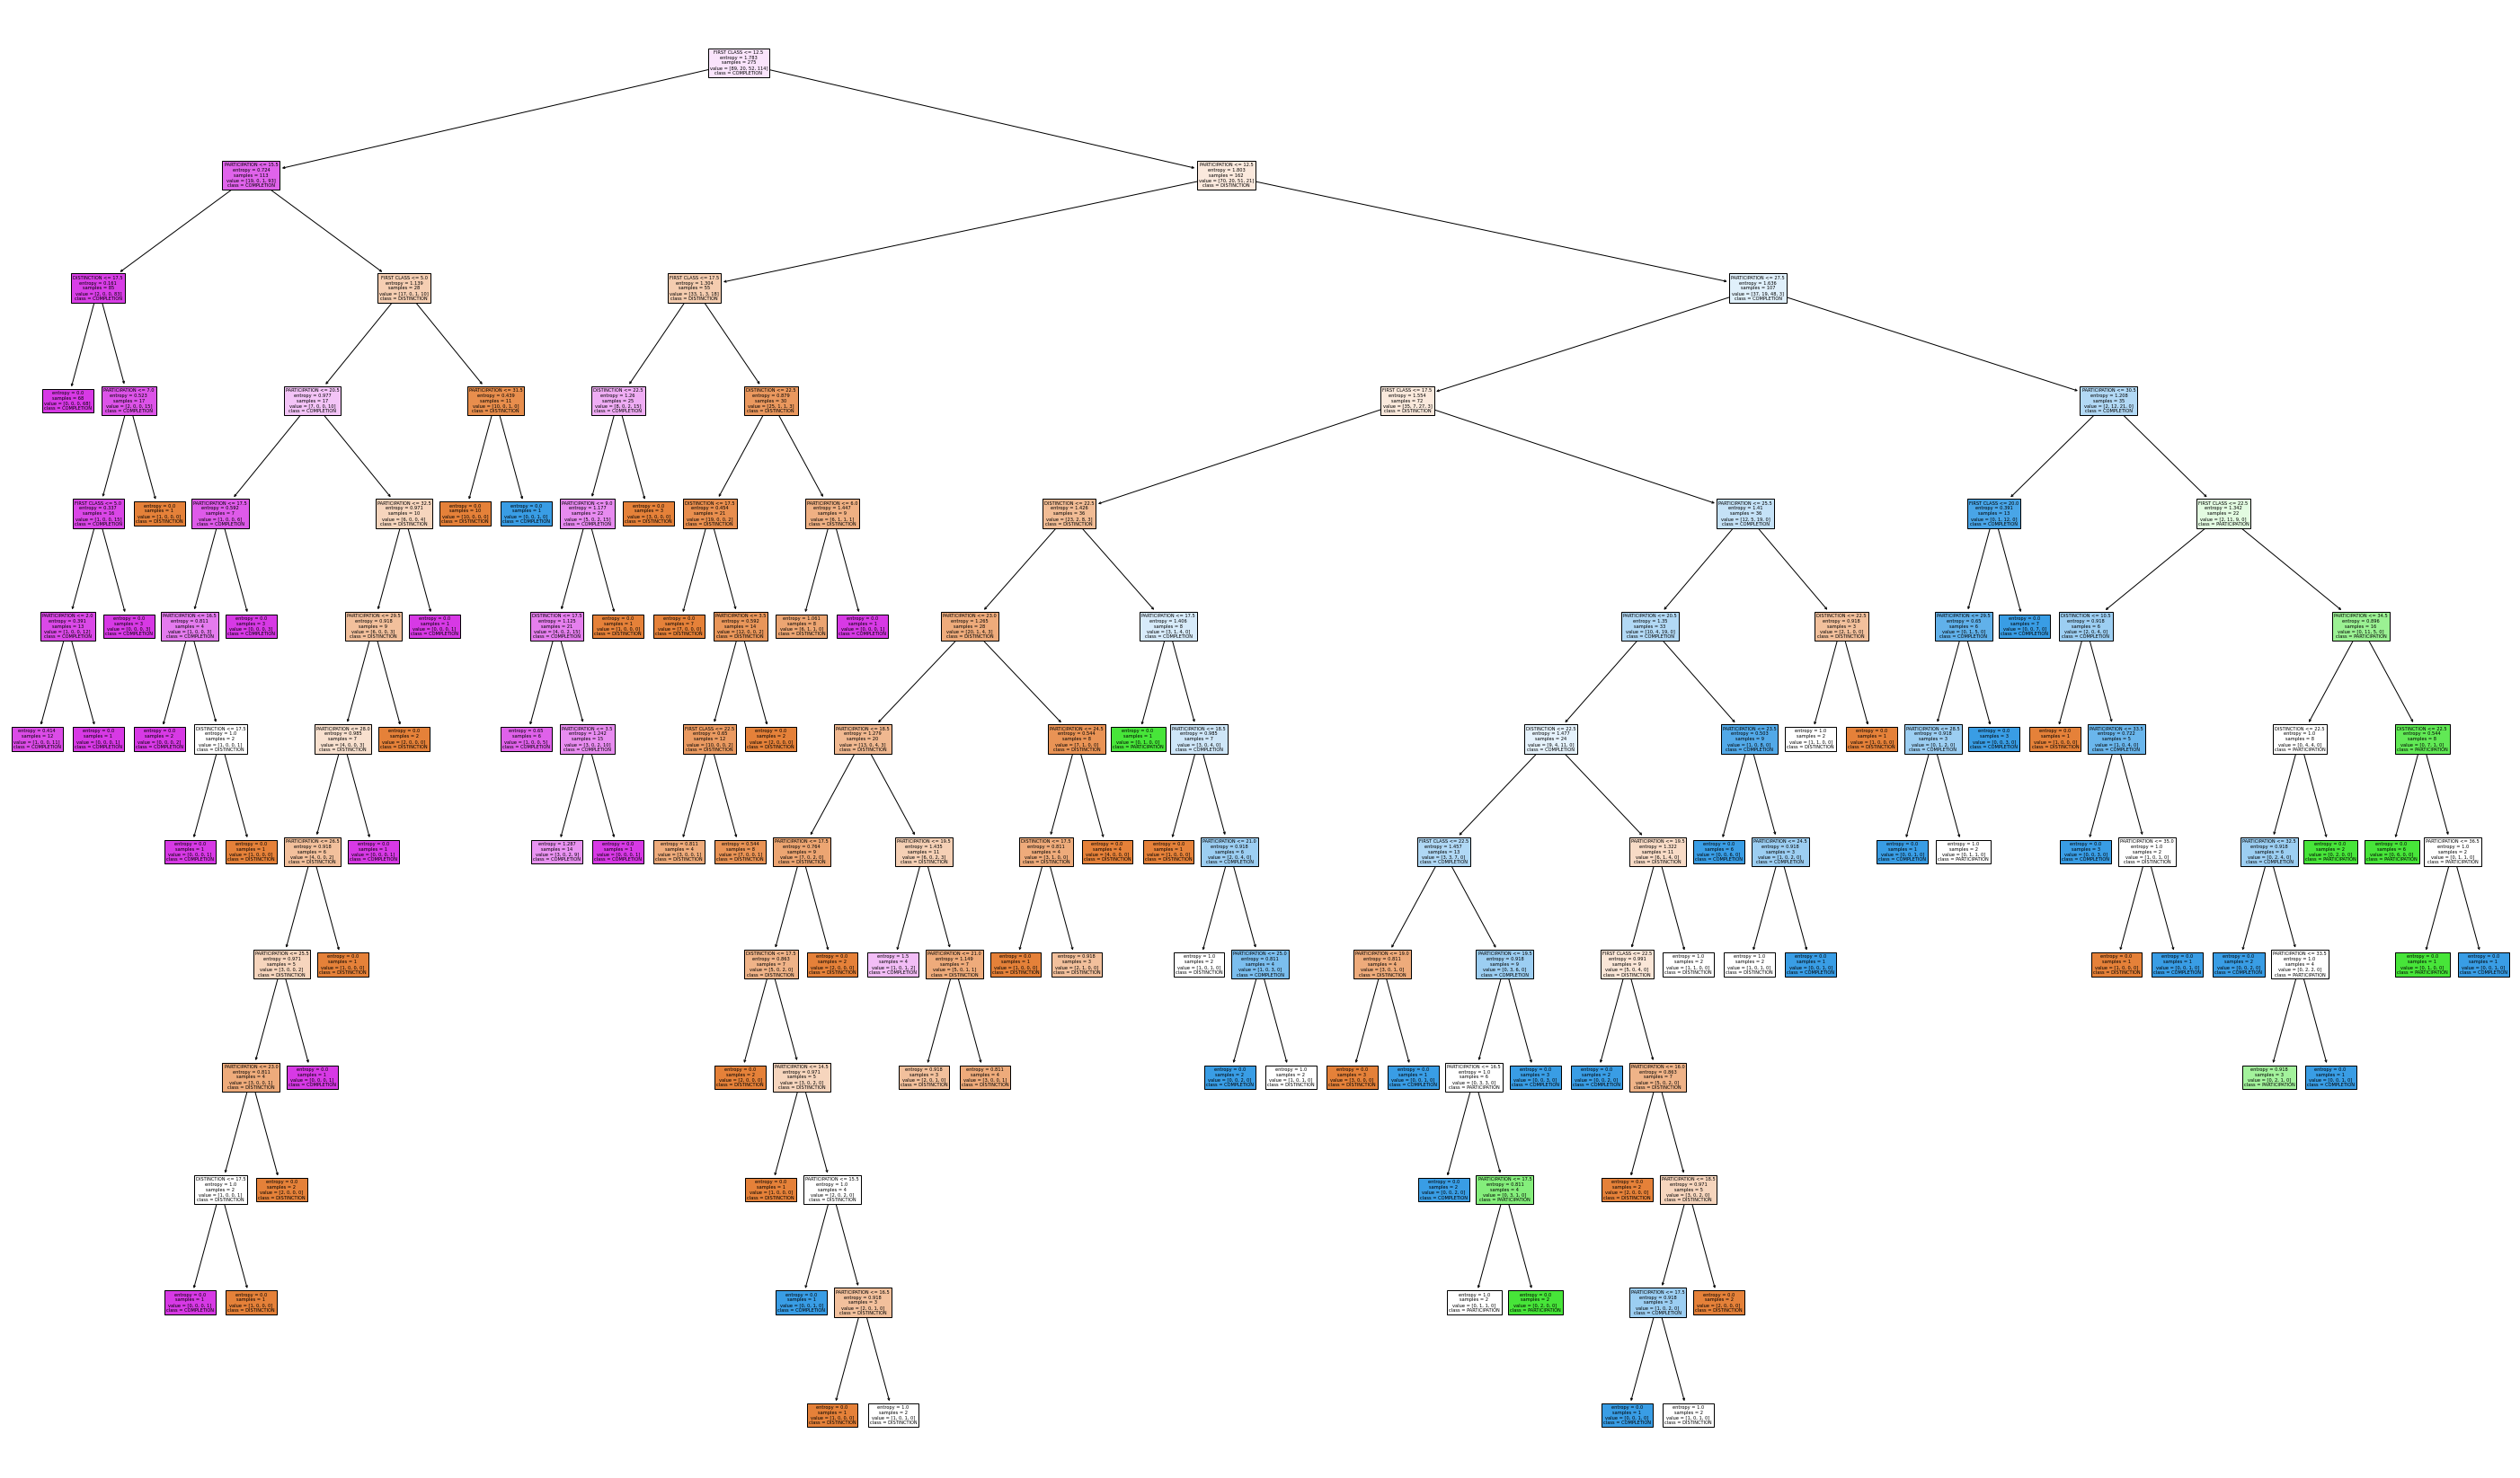

In [41]:
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(z,feature_names=final.Actual,class_names=final.Predicted,filled=True)